Support Vector Machine Accuracy: 94.20%
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.89      0.81      0.85       111
           2       0.95      0.96      0.96       294
           3       0.83      0.87      0.85       186

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



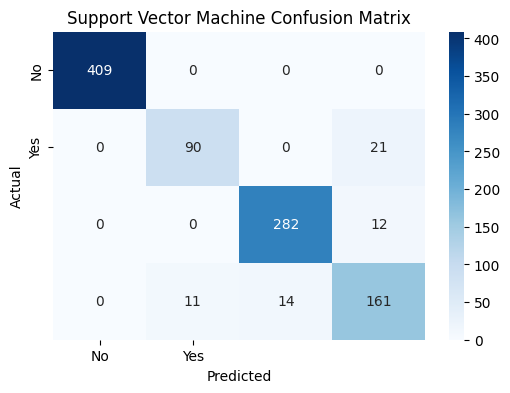

Logistic Regression Accuracy: 94.70%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.92      0.82      0.87       111
           2       0.96      0.96      0.96       294
           3       0.84      0.89      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



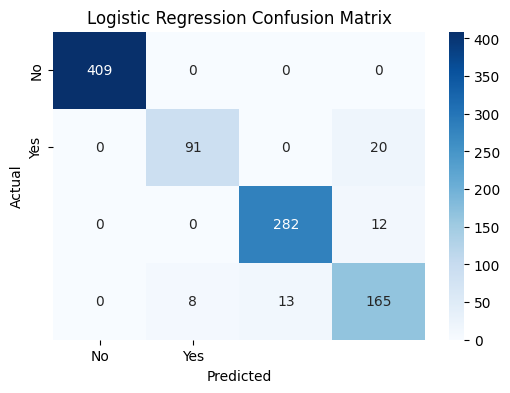

Decision Tree Accuracy: 91.70%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.77      0.86      0.81       111
           2       0.96      0.90      0.93       294
           3       0.79      0.79      0.79       186

    accuracy                           0.92      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.92      0.92      0.92      1000



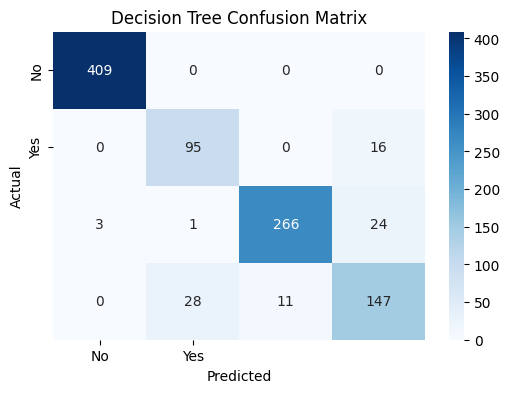

Random Forest Accuracy: 95.50%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.90      0.87      0.89       111
           2       0.97      0.96      0.97       294
           3       0.87      0.89      0.88       186

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.96      0.95      0.96      1000



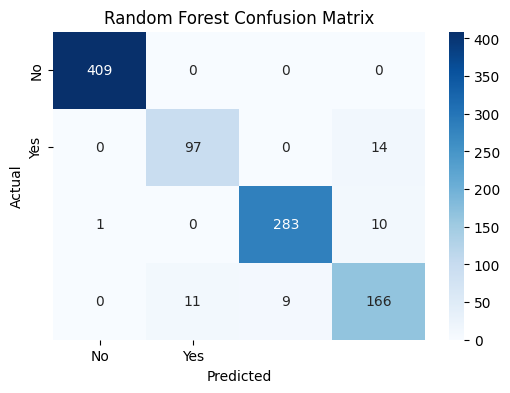

k-Nearest Neighbors Accuracy: 93.50%
k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.95      0.72      0.82       111
           2       0.94      0.96      0.95       294
           3       0.80      0.88      0.84       186

    accuracy                           0.94      1000
   macro avg       0.92      0.89      0.90      1000
weighted avg       0.94      0.94      0.93      1000



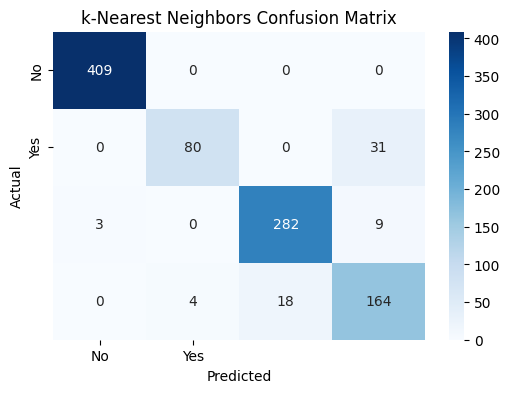

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset

data = pd.read_csv('updated_pollution_dataset.csv')

# Preprocessing
# Handle missing values (if any)
# data.fillna(data.mean(), inplace=True)

# Encode categorical variables
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Split the dataset into training and testing sets
X = data.drop('Air Quality', axis=1)  # Replace 'target' with your actual target column name
y = data['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to train models, visualize confusion matrices, and print accuracy
def train_and_visualize(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    
    # Print accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}%")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Initialize models
models = {
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Train and visualize for each model
for name, model in models.items():
    train_and_visualize(model, name)
